<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/Average_Lead_Lag_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir)

In [3]:
pip install dtw

  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5299 sha256=43b39add09ad0cf3e0864658cdb38b2cb733dd6673af227d479dcb0946c70d36
  Stored in directory: /root/.cache/pip/wheels/71/31/62/5e67f6e31521b8cc1652aa58b1ed0c892514d01eeee85fd49c
Successfully built dtw


In [4]:
pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.4 MB/s eta 0:00:00


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

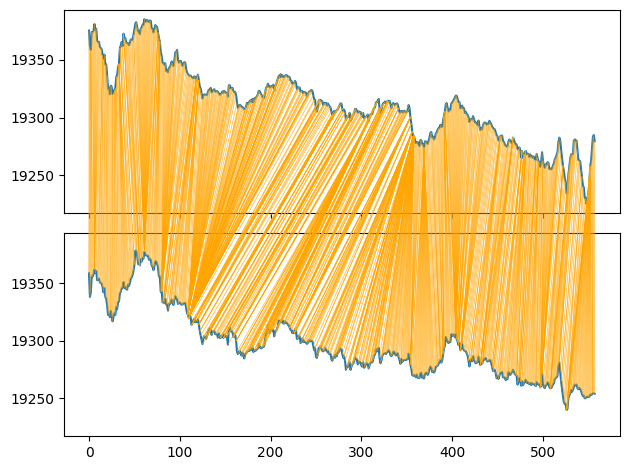

In [5]:
#DTW BETWEEN OPTION PRICE AND SPOT PRICE
df1=data[['Price of Synthetic option derived future']]
df2=data[['Spot price ltp NIFTY50']]
a=df1['Price of Synthetic option derived future'].values
b=df2['Spot price ltp NIFTY50'].values
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

path = dtw.warping_path(b, a)
dtwvis.plot_warping(b, a,path) # Draw the warping path
#path   #ALIGNMENT OF OPTION PRICE TO SPOT PRICE WHERE (i,j) represents the indices of Spot prices and Option prices respectively.



In [ ]:
#Counting of each point in option prices mapped to how many points in spot prices
import numpy as np

def count_aligned_points(warping_path):
    aligned_points_count = {}

    for i, j in warping_path:
        if j in aligned_points_count:
            aligned_points_count[j] += 1
        else:
            aligned_points_count[j] = 1

    return aligned_points_count

aligned_points_count = count_aligned_points(path)

# Print the result
for j, count in aligned_points_count.items():
    print(f'Number of aligned points for(Option Prices) r_{j}: {count}')


In [7]:
#Point Measurement of a single point
import numpy as np

def point_measurement(query_series, reference_series, warping_path, j):
    # Extract the indices (i values) from the warping path where q_i is aligned with r_j
    aligned_indices = [i for i, aligned_j in warping_path if aligned_j == j]
    delta = aligned_points_count[j] # Number of points mapped to r_j
    timestamps_q = [i for i in aligned_indices]
    # Calculate the point measurement PLL_j
    #print(sum((t_q - j) for t_q in timestamps_q))
    pll_j = 1 / (delta) * sum((t_q - j) for t_q in timestamps_q)

    return pll_j


j =221 # Example: calculate PLL for r_1

pll_value = point_measurement(a,b, path, j)
print(f'PLL_{j}: {pll_value}')


PLL_221: 115.0


In [8]:
#Point Measurement of all values in Option prices(Reference Series)
def calculate_pll_for_reference_series(query_series, reference_series, warping_path):
    pll_values = {}

    for j in range(len(reference_series)):
        pll_values[j] = point_measurement(query_series, reference_series, warping_path, j)

    return pll_values
pll_values=calculate_pll_for_reference_series(b,a,path)

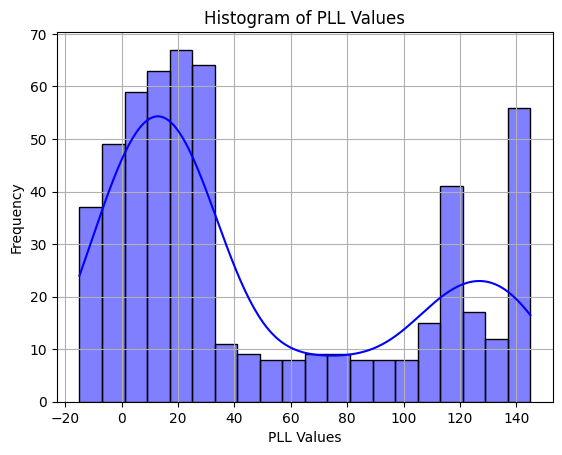

In [9]:
#Extracted pll values and plotting
import seaborn as sns

extract_pll_values = list(pll_values.values())
#plt.hist(extract_pll_values,bins=20)
sns.histplot(extract_pll_values, bins=20, kde=True, color='blue', edgecolor='black')
plt.xlabel('PLL Values')
plt.ylabel('Frequency')
plt.title('Histogram of PLL Values')
plt.grid(True)
plt.show()

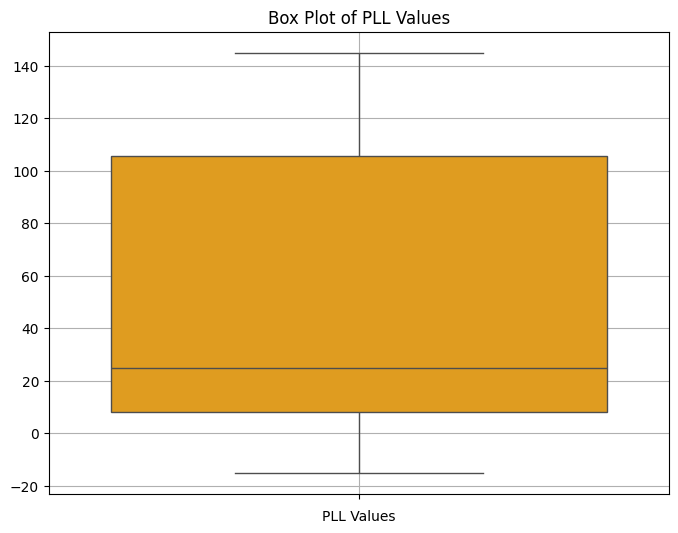

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(extract_pll_values, color='orange')
plt.xlabel('PLL Values')
plt.title('Box Plot of PLL Values')
plt.grid(True)
plt.show()

In [11]:
#Average Lead Lag times over the interval of 100 values
def average_lead_lag_times(query_series, reference_series, warping_path, k):
    n = len(reference_series)
    num_intervals = n // k

    # Calculate average lead-lag for each interval
    avg_lead_lag_times = []
    for interval in range(num_intervals):
        start_idx = interval * k
        end_idx = (interval + 1) * k
        interval_pll_values = [point_measurement(query_series, reference_series, warping_path, j) for j in range(start_idx, end_idx)]
        avg_lead_lag_times.append(np.mean(interval_pll_values))

    return avg_lead_lag_times
average_lead_lag_values=average_lead_lag_times(b,a,path,20)

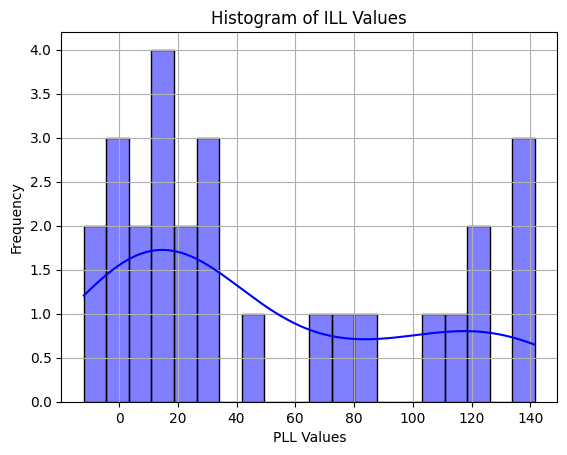

In [12]:
sns.histplot(average_lead_lag_values, bins=20, kde=True, color='blue', edgecolor='black')
plt.xlabel('PLL Values')
plt.ylabel('Frequency')
plt.title('Histogram of ILL Values')
plt.grid(True)
plt.show()

#Statistical Analysis of Average Lead Lag Values




In [24]:
#Statistical Analysis of Average Lead Lag Values
#Mean and SD
mean_lead_lag = np.mean(average_lead_lag_values)
std_lead_lag = np.std(average_lead_lag_values)
min_pll = np.min(average_lead_lag_values)
max_pll = np.max(average_lead_lag_values)
skewness_pll = stats.skew(average_lead_lag_values)
kurtosis_pll = stats.kurtosis(average_lead_lag_values)

print("Mean Lead-Lag:", mean_lead_lag)
print("Standard Deviation:", std_lead_lag)
print("Minimum PLL:",min_pll )
print("Maximum PLL:",max_pll )
print("Skewness PLL:", skewness_pll)
print("Kurtosis PLL:", kurtosis_pll)


Mean Lead-Lag: 49.724999999999994
Standard Deviation: 50.798243808955384
Minimum PLL: -12.0
Maximum PLL: 141.525
Skewness PLL: 0.6329261145619812
Kurtosis PLL: -1.136152423197635


In [16]:
#Hypothesis Testing
from scipy.stats import ttest_1samp

expected_value = 0  # Replace with your expected value
t_stat, p_value = ttest_1samp(average_lead_lag_values, expected_value)

print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value<0.05:
  print("The average lead-lag times are significantly different from zero.")
else:
  print("There is no Lead Lag Relationship")

t-statistic: 4.991289586052624
p-value: 3.438603167500645e-05
The average lead-lag times are significantly different from zero.


In [17]:
from scipy.stats import t

confidence_level = 0.95
t_critical = t.ppf((1 + confidence_level) / 2, len(average_lead_lag_values) - 1)
margin_of_error = t_critical * (std_lead_lag / np.sqrt(len(average_lead_lag_values)))

confidence_interval = (mean_lead_lag - margin_of_error, mean_lead_lag + margin_of_error)
print("Confidence Interval:", confidence_interval)
#The positive values in the confidence interval (29.63, 69.82) suggest that, on average, the option price series tends to lead the spot price series in the observed data.

Confidence Interval: (29.62988402065086, 69.82011597934913)


#Statistical Analysis of Point Lead Lag Values

In [22]:
#Mean And SD
from scipy import stats
mean_pll = np.mean(extract_pll_values)
std_pll = np.std(extract_pll_values)
min_pll = np.min(extract_pll_values)
max_pll = np.max(extract_pll_values)
skewness_pll = stats.skew(extract_pll_values)
kurtosis_pll = stats.kurtosis(extract_pll_values)


print("Mean PLL:", mean_pll)
print("Standard Deviation:", std_pll)
print("Minimum PLL:", min_pll)
print("Maximum PLL:", max_pll)
print("Skewness PLL:", skewness_pll)
print("Kurtosis PLL:", kurtosis_pll)


Mean PLL: 48.25358422939068
Standard Deviation: 51.96113394219104
Minimum PLL: -15.0
Maximum PLL: 145.0
Skewness PLL: 0.6921536353446217
Kurtosis PLL: -1.1033504349436636


In [26]:
#Hypothesis Testing
from scipy.stats import ttest_1samp

expected_pll = 0  # Replace with your expected value
t_stat_pll, p_value_pll = ttest_1samp(extract_pll_values, expected_pll)

print("t-statistic for PLL Values:", t_stat_pll)
print("p-value for PLL Values:", p_value_pll)
if p_value<0.05:
  print("The pll values are significantly different from zero.")
else:
  print("There is no Lead Lag Relationship")


t-statistic for PLL Values: 21.916871198661937
p-value for PLL Values: 3.0245871952911954e-77
The pll values are significantly different from zero.
